# PORTFOLIO OPTIMIZATION

## Summary of the business part

| Title | Portfolio Optimization | 
| --- | --- |
| **Industry focus** | Finance |
| **Problem statement** | From various options, how investors should choose the most suitable assets that can help gauge market risks and maximize returns successfully? |
| **Business use cases**| Application in planning and governance activities, such as funding, road mapping, and  banking risk management. |  
| **Goals/Metrics** | Maximizing profit relative to the risk taken. |
| **Deliverables** | A notebook outlining findings and recommendations of an investment portfolio involves developing a focused strategy. | 

## I. Introduction:
In investing, portfolio optimization is the task of selecting assets such that the return on investment is maximized while the risk is minimized. For example, an investor may be interested in selecting five stocks from a list of 20 to ensure they make the most money possible. Portfolio optimization methods, applied to private equity, can also help manage and diversify investments in private companies. More recently, with the rise in cryptocurrency, portfolio optimization techniques have been applied to investments in Bitcoin and Ethereum, among others.

Finding the right methods for portfolio optimization is an important part of the work done by investment banks and asset management firms. One of the early methods is called mean variance optimization, which was developed by Harry Markowitz, a fundamental approach based on Modern Portfolio Theory (MPT). MPT argues that an investment’s risk and return characteristics should not be viewed alone, but should be evaluated by how the investment affects the overall portfolio’s risk and return. The MPT is based on the principle that investors want the highest return for the lowest risk. Any optimal portfolio based on the MPT is well-diversified to avoid a crash when a particular asset or asset class underperforms. Diversification involves spreading investments across different asset classes, industries, regions, or other relevant factors to reduce risk. By diversifying, investors can benefit from the non-correlation or low correlation between foreign assets, as losses in some investments may be offset by gains in others. Diversification aims to achieve a more stable and balanced portfolio.

### Table of contents

##### I. Introduction<a class="anchor" id="sub_section_1_1_1"></a>

##### II. Data preparation<a class="anchor" id="sub_section_1_1_1"></a>
1. Accessing Stock Price Data 
2. Exporatory data analysis

##### III. Modeling <a class="anchor" id="sub_section_1_1_1"></a>
1. Portfolio Variance and Volatility
2. Efficient Frontier
3. Optimal weights of assets

##### IV.  Portfolio optimization <a class="anchor" id="sub_section_1_1_1"></a>
1. Stock selection
2. Efficient Frontier
3. Portfolio optimization methods

##### V. Conclusion  <a class="anchor" id="sub_section_1_1_1"></a>


## II. Data preparation
### Accessing Stock Price Data

In [98]:
#Load packages
from vnstock import * #import all functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
#Read data
df = pd.read_excel("/Users/thanhhai/Downloads/DBC.xlsx")
df.head()

,Date,Total Share Volume,Total Value,Market Capitalization,Close,Adjusted Price,Change,% Change,Order matching,Unnamed: 9
0,2023-09-08 00:00:00,"6,828,300",190.276,6.667,27.55,27.6,-400.0,-1.43,"6,828,300",190.276
1,2023-08-08 00:00:00,"14,812,500",403.012,6.764,27.95,28.0,1.8,6.88,"14,812,500",403.012
2,2023-07-08 00:00:00,"6,794,600",178.660,6.328,26.15,26.2,150.0,0.58,"6,794,600",178.660
3,2023-04-08 00:00:00,"6,491,800",169.712,6.292,26.00,26.0,-100.0,-0.38,"6,491,800",169.712
4,2023-03-08 00:00:00,"15,005,400",395.286,6.316,26.10,26.1,600.0,2.35,"15,005,400",395.286


As we can see, there are a lot of different columns for different prices throughout the day, but we will only focus on the ‘Adj Close’ column. This column gives us the closing price after adjustments for all applicable splits and dividend distributions.

In [100]:
def get_stock(ticker):
    data = pd.read_excel(f"/Users/thanhhai/Downloads/{ticker}.xlsx")
    data = data.iloc[::-1]
    data[f'{ticker[0:3]}'] = data["Adjusted Price"]
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index(["Date"], inplace = True,
                    drop = True)
    data = data[[f'{ticker}']] 
    print(data.head())
    return data 

Now, let’s pull stocks for some industries:
1. Banks: MBBank (MBB), Vietcombank (VCB), TPBank (TPB)
2. Food & Beverage: Masan (MWG), DABACO (DBC)
3. Industrial Goods & Services: Viettel (VTK)
4. Personal & Household Goods: PNJ
5. Retail: Thegioididong (CMG)
6. Technology: FPT Corp (FPT), CMC (CMG)

In [101]:
stocks = ['FPT','TPB','MWG','PNJ','CMG','VCB','MBB','DBC','MSN','VTK']
df = pd.DataFrame()
for i in stocks:
    df = pd.concat([company_overview(i),df.loc[:]]).reset_index(drop=True)
df.sort_values('industryEn')

,exchange,shortName,industryID,industryIDv2,industry,industryEn,establishedYear,noEmployees,noShareholders,foreignPercent,website,stockRating,deltaInWeek,deltaInMonth,deltaInYear,outstandingShare,issueShare,companyType,ticker
3,HOSE,MBBank,289,8355,Ngân hàng,Banks,1994,15910,126621,0.232,http://www.mbbank.com.vn,4.2,-0.005,-0.010,-0.140,5214.1,4534.0,NH,MBB
4,HOSE,Vietcombank,289,8355,Ngân hàng,Banks,2008,17215,25183,0.235,http://www.vietcombank.com.vn,3.9,-0.031,-0.077,0.324,5589.1,4732.5,NH,VCB
8,HOSE,TPBank,289,8355,Ngân hàng,Banks,2008,4985,20231,0.288,http://www.tpb.vn,4.3,-0.005,-0.048,0.030,2201.6,2201.6,NH,TPB
1,HOSE,Tập đoàn Masan,218,3577,Thực phẩm và đồ uống,Food & Beverage,2004,37112,4726,0.306,www.masangroup.com,3.2,-0.044,0.031,-0.181,1430.8,1430.8,CT,MSN
2,HOSE,Tập đoàn DABACO,217,3573,Thực phẩm và đồ uống,Food & Beverage,2004,5941,0,0.060,http://www.dabaco.com.vn,3.5,0.005,0.008,0.071,242.0,242.0,CT,DBC
0,UPCOM,Tư vấn thiết kế Viettel,195,2791,Hàng & Dịch vụ Công nghiệp,Industrial Goods & Services,2010,97,627,0.010,http://www.vietteltuvanthietke.com.vn,3.8,-0.010,-0.097,-0.110,8.6,8.6,CT,VTK
6,HOSE,Vàng Phú Nhuận,228,3767,Hàng cá nhân & Gia dụng,Personal & Household Goods,2004,6018,9023,0.490,http://www.pnj.com.vn,4.0,-0.022,0.005,-0.051,328.0,328.2,CT,PNJ
7,HOSE,Thế giới di động,253,5379,Bán lẻ,Retail,2004,40756,20628,0.490,http://www.mwg.vn,3.8,-0.021,0.081,-0.140,1462.6,1463.4,CT,MWG
5,HOSE,Tập đoàn Công nghệ CMC,308,9533,Công nghệ Thông tin,Technology,2009,2365,1130,0.433,http://www.cmc.com.vn,3.5,-0.010,-0.030,0.099,150.6,150.6,CT,CMG
9,HOSE,FPT Corp,310,9537,Công nghệ Thông tin,Technology,2002,45903,48598,0.490,https://www.fpt.com.vn,3.6,-0.026,0.019,0.153,1270.0,1270.0,CT,FPT


In [102]:
from functools import reduce

def combine_stocks(tickers):
    data_frames = []
    for i in tickers:
        data_frames.append(get_stock(i))
        
    df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'], how='outer'), data_frames)
    print(df_merged.head())
    return df_merged

portfolio = combine_stocks(stocks)

             FPT
Date            
2022-09-08  73.3
2022-10-08  73.1
2022-11-08  73.1
2022-12-08  73.5
2022-08-15  75.6
             TPB
Date            
2022-09-08  18.5
2022-10-08  18.3
2022-11-08  18.5
2022-12-08  18.5
2022-08-15  18.8
             MWG
Date            
2022-09-08  62.7
2022-10-08  63.0
2022-11-08  62.4
2022-12-08  62.4
2022-08-15  64.4
             PNJ
Date            
2022-09-08  85.5
2022-10-08  85.4
2022-11-08  83.6
2022-12-08  83.1
2022-08-15  84.1
             CMG
Date            
2022-09-08  45.8
2022-10-08  45.0
2022-11-08  45.3
2022-12-08  46.6
2022-08-15  48.8
             VCB
Date            
2022-09-08  68.4
2022-10-08  68.2
2022-11-08  69.0
2022-12-08  69.1
2022-08-15  69.3
             MBB
Date            
2022-09-08  19.3
2022-10-08  19.2
2022-11-08  18.9
2022-12-08  19.1
2022-08-15  19.3
             DBC
Date            
2022-09-08  25.5
2022-10-08  25.0
2022-11-08  25.7
2022-12-08  26.8
2022-08-15  28.6
              MSN
Date             
2022-09-08  

### Exporatory data analysis
We have pulled the required data downloaded from a verified site such as Vietstock. The dates for which we are pulling the data is from 9st August, 2022 to 9st August, 2023.

In [103]:
portfolio

,FPT,TPB,MWG,PNJ,CMG,VCB,MBB,DBC,MSN,VTK
Date,,,,,,,,,,
2022-09-08,73.3,18.5,62.7,85.5,45.8,68.4,19.3,25.5,105.2,22600
2022-10-08,73.1,18.3,63.0,85.4,45.0,68.2,19.2,25.0,105.8,22400
2022-11-08,73.1,18.5,62.4,83.6,45.3,69.0,18.9,25.7,106.8,21900
2022-12-08,73.5,18.5,62.4,83.1,46.6,69.1,19.1,26.8,107.2,20900
2022-08-15,75.6,18.8,64.4,84.1,48.8,69.3,19.3,28.6,108.5,20900
...,...,...,...,...,...,...,...,...,...,...
2023-03-08,83.7,18.5,52.7,81.3,49.0,90.6,18.9,26.1,86.1,19600
2023-04-08,83.3,19.0,53.0,80.8,49.2,90.1,19.0,26.0,86.3,19600
2023-07-08,84.5,19.3,53.8,82.2,49.4,90.8,19.4,26.2,88.2,19500


In [104]:
portfolio.shape

(251, 10)

In [105]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-09-08 to 2023-09-08
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FPT     251 non-null    float64
 1   TPB     251 non-null    float64
 2   MWG     251 non-null    float64
 3   PNJ     251 non-null    float64
 4   CMG     251 non-null    float64
 5   VCB     251 non-null    float64
 6   MBB     251 non-null    float64
 7   DBC     251 non-null    float64
 8   MSN     251 non-null    float64
 9   VTK     251 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 21.6 KB


In [106]:
portfolio['VTK'] = portfolio['VTK'] / 1000

In [107]:
portfolio.head()

,FPT,TPB,MWG,PNJ,CMG,VCB,MBB,DBC,MSN,VTK
Date,,,,,,,,,,
2022-09-08,73.3,18.5,62.7,85.5,45.8,68.4,19.3,25.5,105.2,22.6
2022-10-08,73.1,18.3,63.0,85.4,45.0,68.2,19.2,25.0,105.8,22.4
2022-11-08,73.1,18.5,62.4,83.6,45.3,69.0,18.9,25.7,106.8,21.9
2022-12-08,73.5,18.5,62.4,83.1,46.6,69.1,19.1,26.8,107.2,20.9
2022-08-15,75.6,18.8,64.4,84.1,48.8,69.3,19.3,28.6,108.5,20.9


## II. Modeling
### 1. Portfolio Variance and Volatility

#### Covariance and correlation matrix
The first step is to obtain a covariance and correlation matrix to understand how different assets behave with respect to each other. 

**Covariance**

Covariance measures the directional relationship between the returns on two assets.
A positive covariance means that returns of the two assets move together while a negative covariance means they move inversely. Risk and volatility can be reduced in a portfolio by pairing assets that have a negative covariance.

**Correlation**

Correlation, in the finance and investment industries, is a statistic that measures the degree to which two securities move in relation to each other. Correlations are used in advanced portfolio management, computed as the correlation coefficient, which has a value that must fall between -1.0 and +1.0.
- A correlation of -1 means negative relation, i.e, if correlation between Asset A and Asset B is -1, if Asset A increases, Asset B decreases.
- A correlation of +1 means positive relation, i.e, if correlation between Asset A and Asset B is 1, if Asset A increases, Asset B increases.
- A correlation of 0 means no relation, i.e, if correlation between Asset A and Asset B is 0, they dont have any effect on each other.

In [108]:
cov_matrix = portfolio.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,FPT,TPB,MWG,PNJ,CMG,VCB,MBB,DBC,MSN,VTK
FPT,0.000196,0.000121,0.000229,0.000079,0.000176,0.000099,0.000211,0.000228,0.000141,0.000101
TPB,0.000121,0.000420,0.000197,0.000064,0.000199,0.000150,0.000284,0.000253,0.000140,0.000034
MWG,0.000229,0.000197,0.000712,0.000173,0.000358,0.000154,0.000386,0.000427,0.000306,0.000185
PNJ,0.000079,0.000064,0.000173,0.000261,0.000135,0.000063,0.000126,0.000132,0.000145,0.000057
CMG,0.000176,0.000199,0.000358,0.000135,0.000585,0.000151,0.000296,0.000360,0.000182,0.000208
VCB,0.000099,0.000150,0.000154,0.000063,0.000151,0.000296,0.000182,0.000144,0.000162,0.000066
MBB,0.000211,0.000284,0.000386,0.000126,0.000296,0.000182,0.000487,0.000380,0.000240,0.000194
DBC,0.000228,0.000253,0.000427,0.000132,0.000360,0.000144,0.000380,0.001217,0.000200,0.000127
MSN,0.000141,0.000140,0.000306,0.000145,0.000182,0.000162,0.000240,0.000200,0.000529,0.000099
VTK,0.000101,0.000034,0.000185,0.000057,0.000208,0.000066,0.000194,0.000127,0.000099,0.001366


In [109]:
corr_matrix = portfolio.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,FPT,TPB,MWG,PNJ,CMG,VCB,MBB,DBC,MSN,VTK
FPT,1.000000,0.420216,0.612297,0.347152,0.520472,0.411609,0.681178,0.467087,0.436830,0.194235
TPB,0.420216,1.000000,0.359858,0.193677,0.401426,0.426205,0.628906,0.353362,0.296948,0.044936
MWG,0.612297,0.359858,1.000000,0.401382,0.554598,0.334448,0.656517,0.459330,0.498262,0.188060
PNJ,0.347152,0.193677,0.401382,1.000000,0.346148,0.227045,0.354240,0.234344,0.389073,0.094607
CMG,0.520472,0.401426,0.554598,0.346148,1.000000,0.363997,0.555397,0.426579,0.327299,0.232829
VCB,0.411609,0.426205,0.334448,0.227045,0.363997,1.000000,0.479521,0.239955,0.409362,0.104510
MBB,0.681178,0.628906,0.656517,0.354240,0.555397,0.479521,1.000000,0.493225,0.472949,0.238253
DBC,0.467087,0.353362,0.459330,0.234344,0.426579,0.239955,0.493225,1.000000,0.249810,0.098365
MSN,0.436830,0.296948,0.498262,0.389073,0.327299,0.409362,0.472949,0.249810,1.000000,0.116758
VTK,0.194235,0.044936,0.188060,0.094607,0.232829,0.104510,0.238253,0.098365,0.116758,1.000000


**Expected Returns**

Expected returns of an asset are simply the mean of percentage change in its stock prices. So, the value of expected return we obtain here are daily expected returns.
For an yearly expected return value, we will need to resample the data year-wise.

In [110]:
ind_er = portfolio.resample('Y').last().pct_change().mean()
ind_er

FPT    0.139183
TPB    0.338235
MWG    0.145882
PNJ   -0.167043
CMG    0.192500
VCB    0.299410
MBB    0.262069
DBC    0.801418
MSN   -0.145161
VTK   -0.010204
dtype: float64

**Volatility**
Volatility is measured as the standard deviation of a company’s stock.

But volatility for the annual standard deviation. What we get from square root of variance is the daily standard deviation. To convert it to annual standard deviation we multiply the variance by 250 (250 is used because there are 250 trading days in a year.)

In [111]:
ann_sd = portfolio.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

FPT    0.221622
TPB    0.324058
MWG    0.421825
PNJ    0.255557
CMG    0.382335
VCB    0.272048
MBB    0.348807
DBC    0.551569
MSN    0.363581
VTK    0.584307
dtype: float64

In [112]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
FPT,0.139183,0.221622
TPB,0.338235,0.324058
MWG,0.145882,0.421825
PNJ,-0.167043,0.255557
CMG,0.192500,0.382335
VCB,0.299410,0.272048
MBB,0.262069,0.348807
DBC,0.801418,0.551569
MSN,-0.145161,0.363581
VTK,-0.010204,0.584307


DABACO has high risk attached but it also offers the maximum returns. Some like PNJ and MSN, VTK has negative returns.

### 2.Efficient Frontier
Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows the set of optimal portfolios that offer the highest expected return for a given risk level or the lowest risk for a given level of expected return.

**Portfolio Variance**
The variance in prices of stocks are an important indicator of how volatile this investment will be (how returns can fluctuate).
<p style="text-align: center;">variance = (w1σ1)^2 + (w2σ2)^2 + 2w1w2.Cov12</p>

Where:
- w1 = the portfolio weight of the first asset
- w2 = the portfolio weight of the second asset
- σ1 = the standard deviation of the first asset
- σ2 = the standard deviation of the second asset
- Cov1,2 = the co-variance of the two assets, which can thus be expressed as p(1,2)σ1σ2, where p(1,2) is the correlation co-efficient between the two assets

For expected returns, we need to define weights for the assets choosen. In simpler terms, this means we need to decide what percentage of total money hold in each company’s stock.
So, the problem of portfolio optimization is nothing but to find the optimal values of weights that maximizes expected returns while minimizing the risk (standard deviation).

To plot the graph of efficient frontier, we need run a loop. In each iteration, the loop considers different weights for assets and calculates the return and volatility of that particular portfolio combination.

In [113]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(portfolio.columns)
num_portfolios = 10000

We run this loop a 1000 times.

In [114]:
for port in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [115]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(portfolio.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [116]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,FPT weight,TPB weight,MWG weight,PNJ weight,CMG weight,VCB weight,MBB weight,DBC weight,MSN weight,VTK weight
0,0.199689,0.259286,0.036836,0.168101,0.179266,0.004902,0.164546,0.126860,0.184786,0.000368,0.034366,0.099969
1,0.143169,0.230455,0.078961,0.041786,0.007855,0.067929,0.242479,0.243182,0.059920,0.016341,0.130239,0.111307
2,0.146425,0.232540,0.142862,0.125515,0.097097,0.056277,0.056459,0.098982,0.076292,0.057095,0.177681,0.111738
3,0.174351,0.247452,0.029807,0.109969,0.097048,0.128619,0.138341,0.062180,0.105826,0.101968,0.089347,0.136896
4,0.188801,0.251307,0.036462,0.081302,0.062891,0.077807,0.164161,0.096692,0.144444,0.095668,0.093153,0.147419


We can see that there are a number of portfolios with different weights, returns and volatility. Plotting the returns and volatility from this dataframe will give us the efficient frontier for our portfolio

<Axes: xlabel='Volatility', ylabel='Returns'>

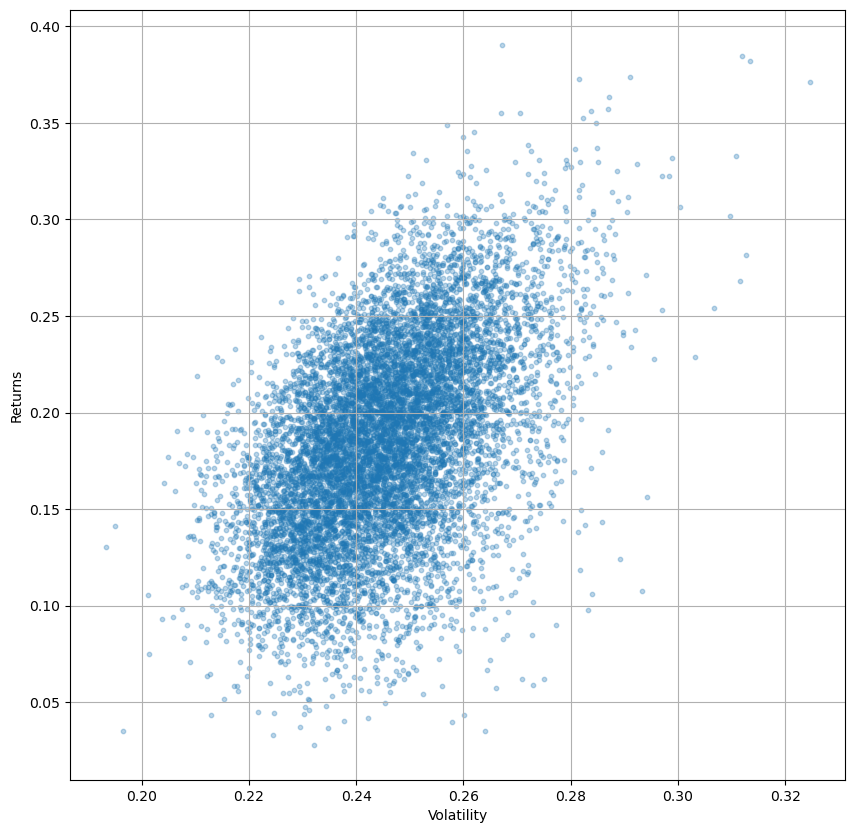

In [117]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

Each point on the line (left edge) represents an optimal portfolio of stocks that maximises the returns for any given level of risk.

The point (portfolios) in the interior are sub-optimal for a given risk level. For every interior point, there is another that offers higher returns for the same risk.

### 3. Optimal weights of assets
#### Sharpe Ratio

The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.  The lower the risk and the higher the returns, the higher the Sharpe ratio. The algorithm looks for the maximum Sharpe ratio, which translates to the portfolio with the highest return and lowest risk. Ultimately, the higher the Sharpe ratio, the better the performance of the portfolio. 

The optimal risky portfolio is the one with the highest Sharpe ratio. The formula for this ratio is:
<p style="text-align: center;">Sharpe Ratio = (Rp – Rf)/ SDp</p>
where,

- Rp is the return of portfolio
- Rf is the risk free rate
- SDp is the standard deviation of the portfolio’s returns

We define the risk-free rate to be 1% or 0.01.

In [118]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns       0.390496
Volatility    0.267177
FPT weight    0.014116
TPB weight    0.179265
MWG weight    0.015087
PNJ weight    0.080149
CMG weight    0.030719
VCB weight    0.282788
MBB weight    0.086260
DBC weight    0.283115
MSN weight    0.005241
VTK weight    0.023260
Name: 5862, dtype: float64

Our algorithm says we should invest mostly in DBC, FPT, VCB and TPB. We will select only top 3 to invest money in.

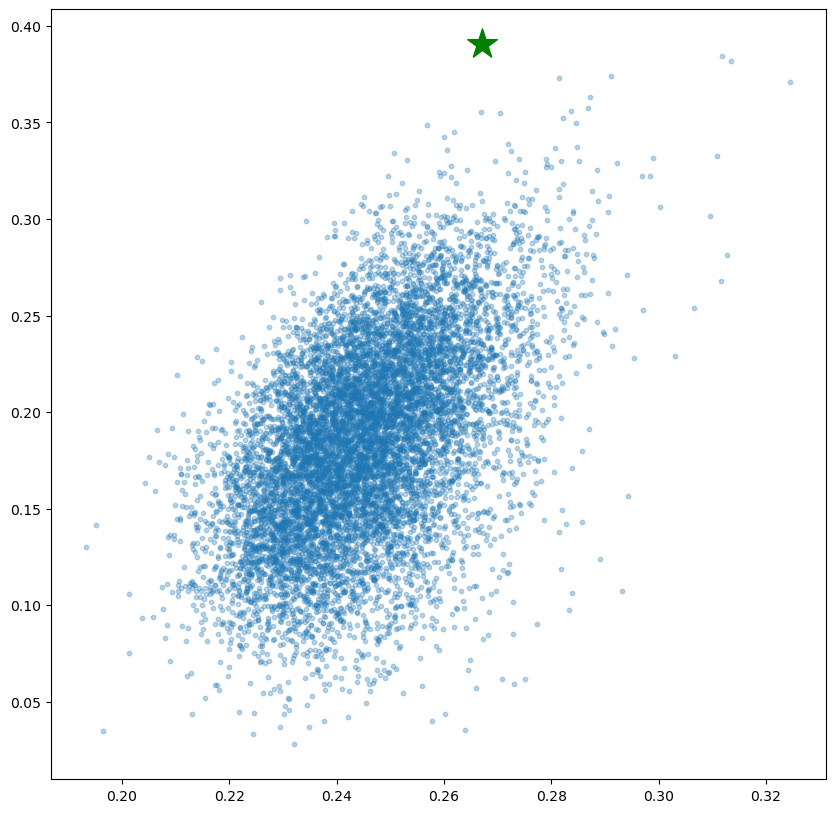

In [119]:
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

## IV. Portfolio optimization

### 1. Stock selection

In [120]:
stocks = ['FPT','VCB','DBC','TPB']
portfolio = combine_stocks(stocks)

             FPT
Date            
2022-09-08  73.3
2022-10-08  73.1
2022-11-08  73.1
2022-12-08  73.5
2022-08-15  75.6
             VCB
Date            
2022-09-08  68.4
2022-10-08  68.2
2022-11-08  69.0
2022-12-08  69.1
2022-08-15  69.3
             DBC
Date            
2022-09-08  25.5
2022-10-08  25.0
2022-11-08  25.7
2022-12-08  26.8
2022-08-15  28.6
             TPB
Date            
2022-09-08  18.5
2022-10-08  18.3
2022-11-08  18.5
2022-12-08  18.5
2022-08-15  18.8
             FPT   VCB   DBC   TPB
Date                              
2022-09-08  73.3  68.4  25.5  18.5
2022-10-08  73.1  68.2  25.0  18.3
2022-11-08  73.1  69.0  25.7  18.5
2022-12-08  73.5  69.1  26.8  18.5
2022-08-15  75.6  69.3  28.6  18.8


In [121]:
portfolio

,FPT,VCB,DBC,TPB
Date,,,,
2022-09-08,73.3,68.4,25.5,18.5
2022-10-08,73.1,68.2,25.0,18.3
2022-11-08,73.1,69.0,25.7,18.5
2022-12-08,73.5,69.1,26.8,18.5
2022-08-15,75.6,69.3,28.6,18.8
...,...,...,...,...
2023-03-08,83.7,90.6,26.1,18.5
2023-04-08,83.3,90.1,26.0,19.0
2023-07-08,84.5,90.8,26.2,19.3


### 2. Efficient Frontier
#### Covariance and correlation matrix

In [122]:
cov_matrix = portfolio.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,FPT,VCB,DBC,TPB
FPT,0.000196,0.000099,0.000228,0.000121
VCB,0.000099,0.000296,0.000144,0.000150
DBC,0.000228,0.000144,0.001217,0.000253
TPB,0.000121,0.000150,0.000253,0.000420


In [123]:
corr_matrix = portfolio.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,FPT,VCB,DBC,TPB
FPT,1.000000,0.411609,0.467087,0.420216
VCB,0.411609,1.000000,0.239955,0.426205
DBC,0.467087,0.239955,1.000000,0.353362
TPB,0.420216,0.426205,0.353362,1.000000


Expected Returns & Volatility

In [124]:
ind_er = portfolio.resample('Y').last().pct_change().mean()

In [125]:
ann_sd = portfolio.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))

In [126]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
FPT,0.139183,0.221622
VCB,0.299410,0.272048
DBC,0.801418,0.551569
TPB,0.338235,0.324058


#### Efficient Frontier

In [127]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(portfolio.columns)
num_portfolios = 10000

In [128]:
for port in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [129]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(portfolio.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [130]:
portfolios  = pd.DataFrame(data)
portfolios.head()

,Returns,Volatility,FPT weight,VCB weight,DBC weight,TPB weight
0,0.441643,0.268856,0.048538,0.410601,0.278531,0.262330
1,0.416527,0.267984,0.200067,0.178723,0.269989,0.351220
2,0.386365,0.250287,0.086952,0.355102,0.171044,0.386902
3,0.488837,0.294970,0.047345,0.357737,0.375477,0.219441
4,0.383162,0.250557,0.031237,0.431509,0.146590,0.390664


<Axes: xlabel='Volatility', ylabel='Returns'>

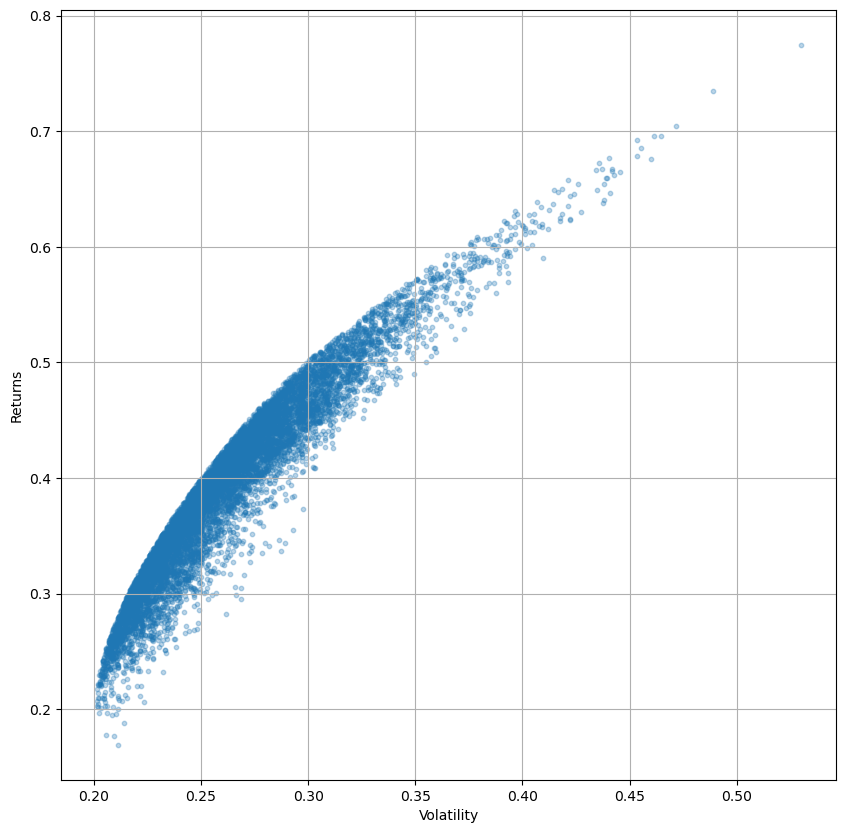

In [131]:
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])


### 3. Portfolio optimization methods

#### Portfolio with minimum Volatility (Risk)

In [132]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns       0.202748
Volatility    0.201319
FPT weight    0.642915
VCB weight    0.285771
DBC weight    0.007733
TPB weight    0.063581
Name: 3458, dtype: float64

The minimum volatility is in a portfolio where the weights of FPT, VCB, DBC and TPB are 61%, 28%, 1% and 10% respectively. This point can be plotted on the efficient frontier graph as shown:

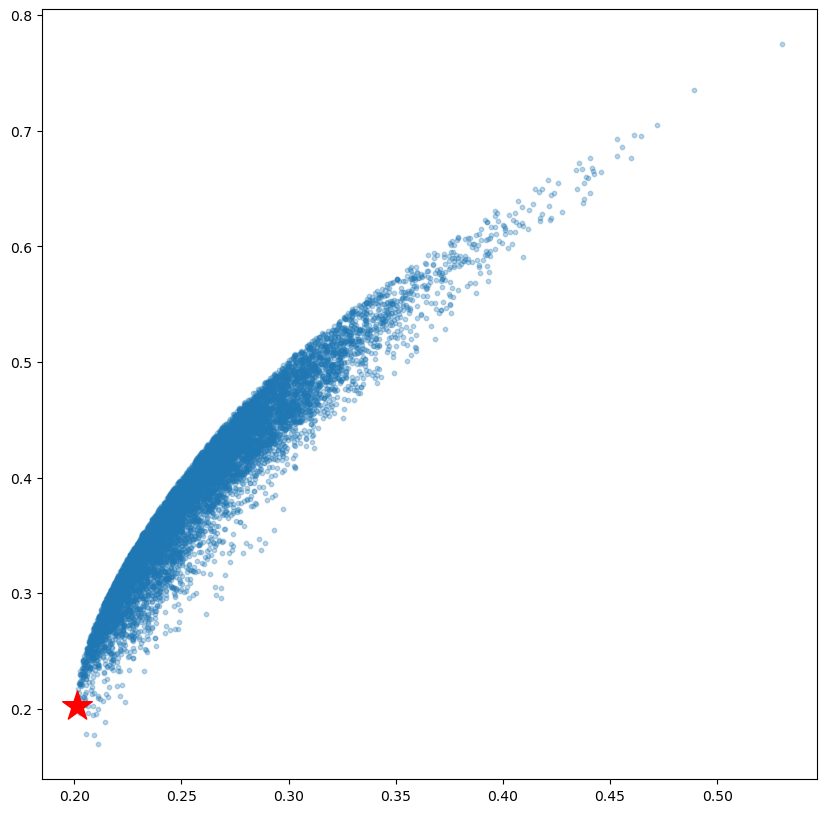

In [133]:
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

The red star denotes the most efficient portfolio with minimum volatility.

#### Optimal Portfolio (Maximum Sharpe Ratio)

In [134]:
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns       0.506845
Volatility    0.303216
FPT weight    0.001628
VCB weight    0.432502
DBC weight    0.400978
TPB weight    0.164893
Name: 3200, dtype: float64

The maximum Sharpe Ratio is in a portfolio where the weights of VCB, DBC, TPB are 46%, 39%, 14% respectively.

We can notice that while the difference in risk between minimum volatility portfolio and optimal risky portfolio is just 10%, the difference in returns is a whopping 19%.

We can plot this point too on the graph of efficient frontier.

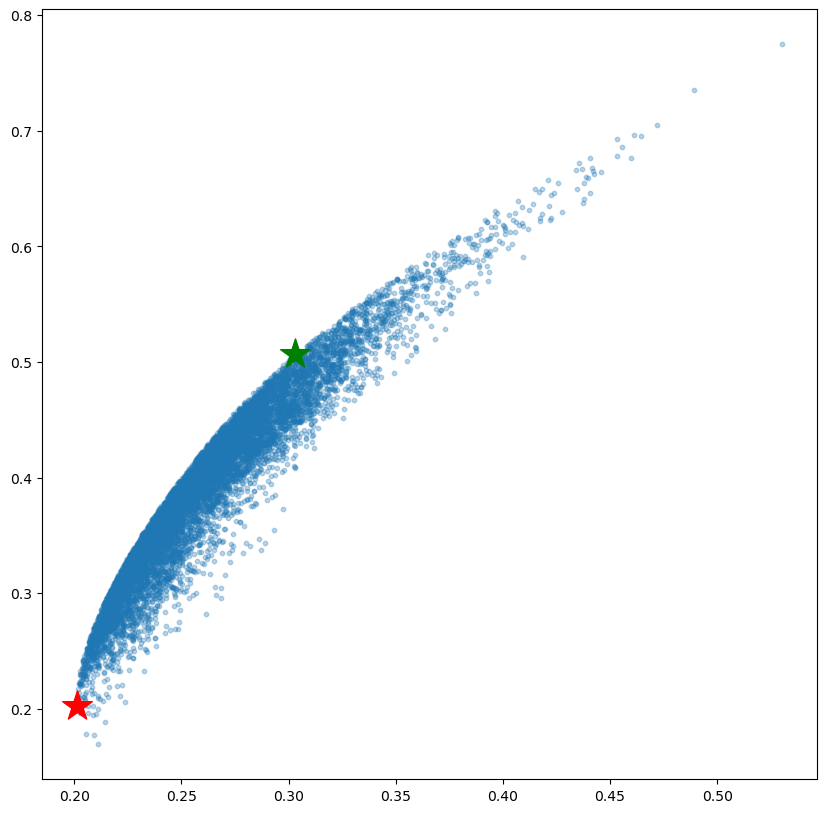

In [135]:
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

## V. Conclusion

In each of cases, the task of optimizing assets involves balancing the trade-offs between risk and return, where return on a stock is the profits realized after a period of time and risk is the standard deviation in an asset's value. Many of the available methods of portfolio optimization are essentially extensions of diversification methods for assets in investing. The idea here is that having a portfolio of different types of assets is less risky than having ones that are similar.

Finding the right methods for portfolio optimization is an important part of the work done by investment banks and asset management firms. One of the early methods is mean variance optimization based on modern portfolio theory, it has many limitations such as assuming that historical returns completely reflect future returns. So this data may not be applicable to new circumstances in the market. Besides, MPT functions based on a standardized set of assumptions about market behavior. These might not bear out in a constantly changing financial climate.

Additional methods like hierarchical risk parity (HRP), mean conditional value at risk (mCVAR), a tactical asset allocation approach may be an option that could address some of the limitations of the mean variance optimization method. 

Portfolio optimization plays a critical role in industry by enabling businesses to maximize returns and minimize risks. It provides a systematic approach to decision-making, ensuring that investments are aligned with the organization's financial objectives. By optimizing the asset allocation, businesses can improve their risk-adjusted returns, enhance their portfolio's diversification, and effectively manage their exposure to market fluctuations.